In [1]:
import numpy as np

### QUESTION 1

In [2]:
# Constants
c = 2.998e8
h = 6.626e-34
k = 1.381e-23

# Sun(M = M_solar) Properties
L_s = 3.90e26
R_s = 6.96e8

# M = 7*M_solar
T_7 = 20000
L_7 = 4.0e29

# M = 12*M_solar
T_12 = 25000
L_12 = 4.0e30

In [3]:
def surface_temp(L,R):
    return f'T = {((15 * L * c**2 * h**3)/(8 * np.pi**6 * k**4 * R**2))**0.25} K'

def radius(L,T):
    return f'R = {((15 * L * c**2 * h**3)/(8 * np.pi**6 * k**4 * T**4))**0.5:.4e} m'

print(surface_temp(L_s,R_s))
print(radius(L_7,T_7))
print(radius(L_12,T_12))

T = 5796.258559815972 K
R = 1.8722e+09 m
R = 3.7890e+09 m


In [4]:
# Constants
v0 = 3.29e15
a_v0 = 6.3e-22
alpha_5 = 4.54e-19
alpha_10 = 2.59e-19
alpha_20 = 2.52e-19


n_H = 1e6
T = 1e4
T_s = 1e4
R = 1.87e9

1.76225925569876e+38


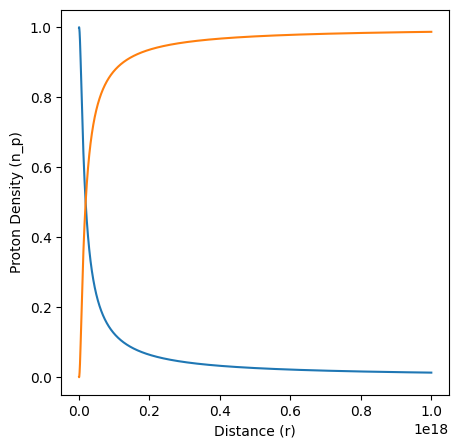

In [5]:
import matplotlib.pyplot as plt

def y(v):
    numerator = v**-1
    numerator *= (2 * np.pi * a_v0 * v0**3 * R**2) / (alpha_10 * c**2)
    denominator = np.exp((h * v) / (k * T_s)) - 1
    return numerator / denominator

def integral(v):
    integral_sum = 0
    for i in range(1, len(v)):
        integral_sum += y(v[i]) * (v[i] - v[i-1])
    return integral_sum

v = np.linspace(v0, 1e16, 10000)
r = np.linspace(R, 1e18, 10000)
I = integral(v)
print(I)
proton = (-I + (I**2 + 4 * r**2 * I * n_H)**0.5) / (2 * r**2)

fig, axs = plt.subplots(figsize=(5, 5))
axs.plot(r, proton/(n_H))
axs.plot(r, 1 - proton/n_H)
axs.set_xlabel('Distance (r)')
axs.set_ylabel('Proton Density (n_p)')
plt.show()

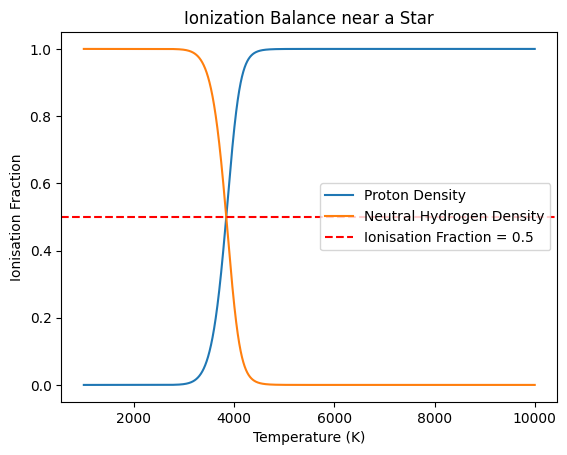

In [18]:
eta = 1e-9
m_e = 9.11e-31
Q = 2.2e-18

def F(temp):
    return 3.8 * eta * ((k * temp) / (m_e * c**2))**1.5 * np.exp(Q / (k * temp))

temps = np.linspace(1000, 10000, 10000)
F = F(temps)

x_p = (-1 + np.sqrt(1 + (4 * F))) / (2 * F)

plt.plot(temps, x_p, label='Proton Density')
plt.plot(temps,1 - x_p, label='Neutral Hydrogen Density')
plt.axhline(y=0.5, color='r', linestyle='--', label='Ionisation Fraction = 0.5')
plt.xlabel('Temperature (K)')
plt.ylabel('Ionisation Fraction')
plt.title('Ionization Balance near a Star')
plt.legend()
plt.show()